In [181]:
import MENDER
import scanpy as sc
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [182]:
adata_raw = sc.read_h5ad('Dataset1_MERFISH.h5ad')

In [183]:
adata_raw

AnnData object with n_obs × n_vars = 5488 × 155
    obsm: 'spatial'

In [184]:
adata_raw.var_names = [f"Gene_{i:d}" for i in range(adata_raw.n_vars)]
print(adata_raw.var_names[:10])

Index(['Gene_0', 'Gene_1', 'Gene_2', 'Gene_3', 'Gene_4', 'Gene_5', 'Gene_6',
       'Gene_7', 'Gene_8', 'Gene_9'],
      dtype='object')


In [185]:
# input parameters of MENDER
scale = 6
radius = 15
n_domains = 8

adata = adata_raw.copy()
sc.pp.highly_variable_genes(adata, flavor="seurat_v3", n_top_genes=4000)
sc.pp.normalize_total(adata, inplace=True)
sc.pp.log1p(adata)
sc.pp.pca(adata, n_comps=60)
sc.pp.neighbors(adata)
sc.tl.leiden(adata,resolution=0.5,key_added='ct',random_state=0)
adata.obs['ct'] = adata.obs['ct'].astype('category')



msm = MENDER.MENDER_single(
    adata,
    ct_obs='ct',
    random_seed=0
)

msm.set_MENDER_para(
    n_scales=scale,
    nn_mode='radius',
    nn_para=radius,

)
msm.run_representation()
msm.run_clustering_normal(n_domains)


scale 0, median #cells per radius (r=15): 2.0
scale 1, median #cells per radius (r=15): 4.0
scale 2, median #cells per radius (r=15): 6.0
scale 3, median #cells per radius (r=15): 9.0
scale 4, median #cells per radius (r=15): 11.0
scale 5, median #cells per radius (r=15): 13.0
searching resolution to k=8
Res =  0.1 Num of clusters =  4
Res =  0.15000000000000002 Num of clusters =  5
Res changed to 0.15000000000000002
Res =  0.2 Num of clusters =  5
Res changed to 0.2
Res =  0.25 Num of clusters =  6
Res changed to 0.25
Res =  0.3 Num of clusters =  6
Res changed to 0.3
Res =  0.35 Num of clusters =  7
Res changed to 0.35
Res =  0.39999999999999997 Num of clusters =  7
Res changed to 0.39999999999999997
Res =  0.44999999999999996 Num of clusters =  7
Res changed to 0.44999999999999996
Res =  0.49999999999999994 Num of clusters =  8
recommended res =  0.49999999999999994


MENDER prediction


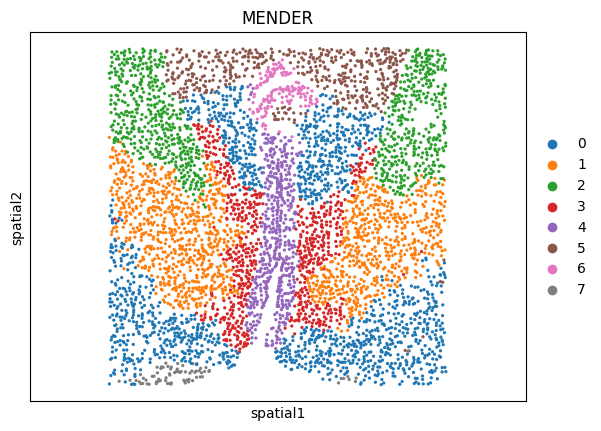

In [186]:
msm.output_cluster(obs='MENDER')
print('MENDER prediction')

In [187]:
msm.adata_MENDER.write_h5ad('osmFISH.h5ad')

In [188]:
adata_mender = sc.read_h5ad('osmFISH.h5ad')

In [189]:
adata_mender.obs

,ct,leiden,MENDER_leiden_k8,MENDER
Unnamed: 0,,,,
-3033x2825,5,0,0,0
-3027x2956,2,0,0,0
-3021x2962,2,0,0,0
-3017x2996,2,0,0,0
-3005x2878,5,0,0,0
...,...,...,...,...
-1431x4324,2,2,2,2
-1347x4422,3,2,2,2
-1365x4412,3,2,2,2


In [190]:
clustering_result = adata_mender.obs[['MENDER']].copy()
clustering_result = clustering_result.reset_index(drop=True)
clustering_result['Id'] = clustering_result.index
clustering_result = clustering_result.rename(columns={'MENDER': 'Label'})

clustering_result = clustering_result[['Id', 'Label']]
clustering_result['Label'] = clustering_result['Label'].astype('int') + 1

print(clustering_result.head())

clustering_result.to_csv('clustering_result_dataset1.csv', index=False)
print("Clustering results saved to 'clustering_result.csv'")

   Id  Label
0   0      1
1   1      1
2   2      1
3   3      1
4   4      1
Clustering results saved to 'clustering_result.csv'
